In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [14]:
df=pd.read_csv('bank-full.csv',sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [15]:
df.default.replace(('yes', 'no'), (1, 0), inplace=True)
df.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [17]:
df=pd.get_dummies(df,columns=['job','marital','education','contact','month','poutcome'])
df 

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [19]:
pd.set_option("display.max.columns", None)

In [20]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [21]:
y=df.iloc[:,10]

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [24]:
x=pd.concat([df.iloc[:,0:10],df.iloc[:,11:]],axis=1)

In [25]:
x.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [30]:
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
classifier.coef_

array([[-1.79973664e-02, -2.05669860e-02,  2.07204886e-05,
        -7.51658057e-01, -2.16634358e-01, -9.65150207e-03,
         3.81231856e-03, -4.13504254e-01,  2.45494042e-03,
        -1.38865289e-01, -3.02995601e-02, -2.84679800e-01,
        -3.02949230e-02, -9.79657621e-03,  7.25763786e-03,
         1.86471714e-01, -1.79985578e-02, -9.98266388e-02,
         3.38633652e-02, -7.84272557e-02,  3.28472931e-03,
         2.76867653e-03,  1.81629650e-02, -1.94869210e-01,
        -1.40970943e-01, -7.83740649e-02, -3.06006553e-01,
         5.14169731e-02,  1.52864563e-02,  1.02940984e-01,
         5.69618338e-02, -4.77580007e-01,  4.61132951e-02,
         2.70063238e-02,  3.23099146e-02, -1.61675638e-02,
        -1.51885821e-02, -9.22034293e-02, -6.14270199e-02,
         9.74634891e-02, -4.66114421e-01, -6.41927758e-02,
         1.10911265e-01,  8.38123164e-02, -1.52004682e-01,
        -3.59655777e-02,  3.49750060e-01, -4.79456989e-01]])

In [32]:
classifier.intercept_

array([-0.31770683])

In [34]:
Beta_coef=pd.Series(classifier.coef_[0])
Beta_coef

0    -0.017997
1    -0.020567
2     0.000021
3    -0.751658
4    -0.216634
5    -0.009652
6     0.003812
7    -0.413504
8     0.002455
9    -0.138865
10   -0.030300
11   -0.284680
12   -0.030295
13   -0.009797
14    0.007258
15    0.186472
16   -0.017999
17   -0.099827
18    0.033863
19   -0.078427
20    0.003285
21    0.002769
22    0.018163
23   -0.194869
24   -0.140971
25   -0.078374
26   -0.306007
27    0.051417
28    0.015286
29    0.102941
30    0.056962
31   -0.477580
32    0.046113
33    0.027006
34    0.032310
35   -0.016168
36   -0.015189
37   -0.092203
38   -0.061427
39    0.097463
40   -0.466114
41   -0.064193
42    0.110911
43    0.083812
44   -0.152005
45   -0.035966
46    0.349750
47   -0.479457
dtype: float64

In [44]:
Coef_df=pd.DataFrame({'Variables':pd.Series(x.columns),
                     "Beat_Coefficient":Beta_coef})
Coef_df

,Variables,Beat_Coefficient
0,age,-0.017997
1,default,-0.020567
2,balance,0.000021
3,housing,-0.751658
4,loan,-0.216634
5,day,-0.009652
6,duration,0.003812
7,campaign,-0.413504
8,pdays,0.002455
9,previous,-0.138865


In [51]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
y_pred_df=pd.DataFrame({"Actual":y,"Predicted":y_pred})
y_pred_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[39162,   760],
       [ 4136,  1153]], dtype=int64)

In [49]:
(39162+1153)/(39162+760+4136+1153)*100

89.1707770232908

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

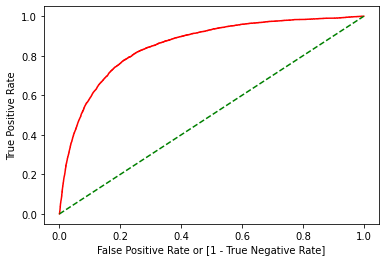

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_pred)

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'g--') 
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [61]:
auc

0.599481249734013